In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
%matplotlib inline
import torch.nn as nn
import torch.nn.functional as F


In [2]:
print(torch.cuda.is_available())
print(torch.cuda.device_count())

print(torch.cuda.current_device())
print(torch.cuda.device(0))
print(torch.cuda.get_device_name(0))

True
1
0
GeForce RTX 2080 with Max-Q Design


In [3]:
data_dir = '../../Images/june5Night/Positive/'      #This is for the home laptop
# data_dir = '../../../../BottleStoodUp_atNight/Positive/'        #For the work laptop

In [4]:
transform_characteristics = transforms.Compose([transforms.ToTensor(),
                                                transforms.Resize(255),
                                                transforms.CenterCrop(224)])
dataset = datasets.ImageFolder(data_dir, transform=transform_characteristics)
# dataloader = torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=True)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=15, shuffle=True)

We see 20 batches of 15 images each. Becasue we have in total 295 of positive images.

# Showing one image

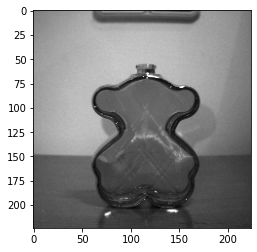

In [9]:
single_img = images[0]
single_img_permuted = single_img.permute(1, 2, 0) 
single_img_numpy = single_img_permuted.detach().numpy()

plt.imshow(single_img_numpy)

# Applying MSE to two random images

In [17]:
def mse(image1, image2):
    squared_diff = np.square(image1 - image2)
    mse_value = np.mean(squared_diff)
    return mse_value

# Example usage
# Assuming image1 and image2 are NumPy arrays of the same shape (height, width, 3)
single_img1 = images[0]
single_img_permuted1 = single_img1.permute(1, 2, 0) 
single_img_numpy1 = single_img_permuted1.detach().numpy()

single_img2 = images[1]
single_img_permuted2 = single_img2.permute(1, 2, 0) 
single_img_numpy2 = single_img_permuted2.detach().numpy()

(224, 224, 3)


In [19]:
mse_value = mse(single_img_numpy1, single_img_numpy2)
print("MSE:", mse_value)

MSE: 0.0034793194


# Analyzing the np.mean()

In [20]:
def mse2(image1, image2):
    squared_diff = np.square(image1 - image2)
    mse_value = np.mean(squared_diff, axis=(0, 1))
    return mse_value

In [21]:
mse_value = mse2(single_img_numpy1, single_img_numpy2)
print("MSE:", mse_value)

MSE: [0.00347932 0.00347932 0.00347932]


In [22]:
print(np.mean(mse_value))

0.003479319


See that using:

- mse_value = np.mean(squared_diff)

directly computes:

- mse_value = np.mean(squared_diff, axis=(0, 1))
- np.mean(mse_value)

Finally, to compute the MSE, use the mse() that is above written